In [1]:
import sys
sys.path.append("..")

from diffusion.gbm_process import simulate_gbm
from calibration.gbm import calibrate_gbm
import QuantLib as ql
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%config IPCompleter.greedy = True

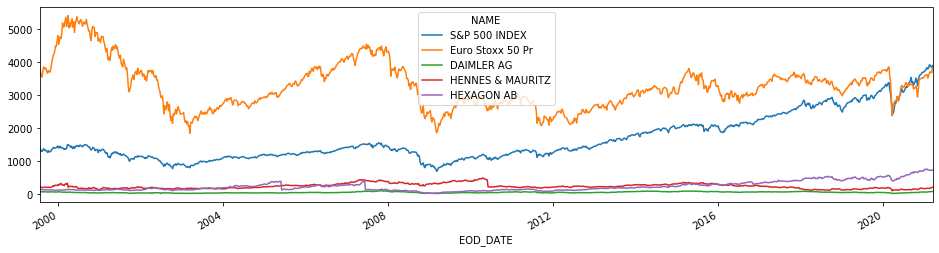

{'S&P 500 INDEX': {'mu': 0.1548851500512584, 'sigma': 0.1102263063999683}, 'Euro Stoxx 50 Pr': {'mu': 0.10040998888613495, 'sigma': 0.16056715156779403}, 'DAIMLER AG': {'mu': 0.20404238958398313, 'sigma': 0.27192696139542627}, 'HENNES & MAURITZ': {'mu': 0.14446689301438032, 'sigma': 0.18127288622879165}, 'HEXAGON AB': {'mu': 0.2853722118654575, 'sigma': 0.2521818340378246}}
{'S&P 500 INDEX': {'mu': 0.1548851500512584, 'sigma': 0.1102263063999683}, 'Euro Stoxx 50 Pr': {'mu': 0.10040998888613495, 'sigma': 0.16056715156779403}, 'DAIMLER AG': {'mu': 0.20404238958398313, 'sigma': 0.27192696139542627}, 'HENNES & MAURITZ': {'mu': 0.14446689301438032, 'sigma': 0.18127288622879165}, 'HEXAGON AB': {'mu': 0.2853722118654575, 'sigma': 0.2521818340378246}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015

C:\python\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



April 1st, 2015
{'S&P 500 INDEX': {'mu': 0.1337769580480933, 'sigma': 0.11024345931573946}, 'Euro Stoxx 50 Pr': {'mu': 0.15767997320468236, 'sigma': 0.15875710844938448}, 'DAIMLER AG': {'mu': 0.20188359471916437, 'sigma': 0.2584878201391053}, 'HENNES & MAURITZ': {'mu': 0.1484704794302422, 'sigma': 0.1807609704478076}, 'HEXAGON AB': {'mu': 0.32443554305846756, 'sigma': 0.24722349936167}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'S&P 500 INDEX': {'mu': 0.16080760810978667, 'sigma': 0.10552544031513235}, 'Euro Stoxx 50 Pr': {'mu': 0.18356089794761996, 'sigma': 0.1613909006118869}, 'DAIMLER AG': {'mu': 0.3016834169629676, 'sigma': 0.24315410850075997}, 'HENNES & MAURITZ': {'mu': 0.1258200807053548, 'sigma': 0.1714711783419266}, 'HEXAGON AB': {'mu': 0.35515411558345533, 'sigma': 0.23677224766134855}}
July 1st, 2015
July 8th, 2015
July 15th, 20

May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'S&P 500 INDEX': {'mu': 0.09514270731066181, 'sigma': 0.1147157826921694}, 'Euro Stoxx 50 Pr': {'mu': 0.0004552303160483516, 'sigma': 0.18084607720299786}, 'DAIMLER AG': {'mu': -0.0656901944879851, 'sigma': 0.27031584155582383}, 'HENNES & MAURITZ': {'mu': -0.2627279384877436, 'sigma': 0.2676086030892574}, 'HEXAGON AB': {'mu': 0.19731951092343875, 'sigma': 0.24982278953128187}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'S&P 500 INDEX': {'mu': 0.1299387122506299, 'sigma': 0.10021122728530103}, 'Euro Stoxx 50 Pr': {'mu': 0.02046541768858102, 'sigma': 0.16154429293247594}, 'DAIMLER AG': {'mu': -0.06383057005033063, 'sigma': 0.271026691497463}, 'HENNES & MAURITZ': {'mu': -0.2822526850237408, 'sigma': 0.263414827820597}, '

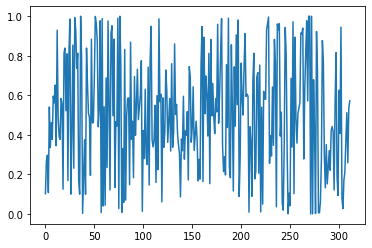

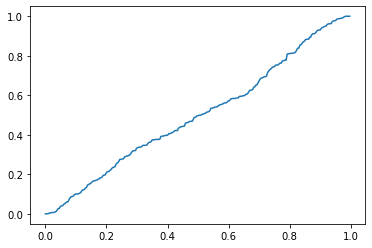

In [67]:
import numpy as np
import pandas as pd
import QuantLib as ql
from os.path import join
import matplotlib.pyplot as plt

from calibration.gbm import calibrate_gbm
from diffusion.gbm_process import simulate_gbm


def backtest_gbm(df_x, horizon_w, backtesting_window_w, calibration_freq_w, equity_name,
                 bt_beginning_date = ql.Date(7, 1, 2015), N=1000):
    df_calibration = df_x[(bt_beginning_date - ql.Period(3, ql.Years)).to_date():
                          bt_beginning_date.to_date()]
    params = calibrate_gbm(df_calibration, delta=1 / 52)
    p_list = []
    for i in range(backtesting_window_w):
        df_calibration = df_x[(bt_beginning_date - ql.Period(3, ql.Years)).to_date():
                              bt_beginning_date.to_date()]
        if i % calibration_freq_w == 0:
            params = calibrate_gbm(df_calibration, delta=1 / 52)

        initial_value = df_x.ix[bt_beginning_date.to_date()].to_frame().T

        date_grid = [bt_beginning_date + ql.Period(i, ql.Days) for i in range(0, horizon_w * 7 + 5)]
        date_grid_sim = [bt_beginning_date + ql.Period(i, ql.Weeks) for i in range(0, horizon_w)]
        df_simulations = simulate_gbm(initial_value[equity_name].values[0], date_grid, N, params[equity_name])
        df_simulations.index = [el.to_date() for el in df_simulations.index]

        d = date_grid_sim[-1].to_date()

        try:
            realisation = df_x.xs(d)[equity_name]
        except:
            print('%s window came to the end of the data, no more realisation' % d)
        simulations = df_simulations.xs(d)

        p = len(simulations[simulations > realisation]) / len(simulations)
        p_list.append(p)

        bt_beginning_date = bt_beginning_date + ql.Period(1, ql.Weeks)
        print(bt_beginning_date)

    return p_list


df = pd.read_csv(join('C:/Users/eyyup/Desktop/packages/masters_thesis/static/data/', 'data_from_mars.csv'))
df = df.pivot_table(index = 'EOD_DATE', values='PRICE', columns=['NAME'])
df.index = pd.to_datetime(df.index)

df = df[[key for key in df.isna().sum().to_frame().sort_values(0).to_dict()[0]]]
df = df.iloc[:, :5].dropna()
df.plot(figsize=(16, 4))
plt.show()


df_x = df
idx = pd.date_range('2010-02-03', '2021-03-10', freq='D')
df_x = df_x.reindex(idx, fill_value=np.nan)
df_x = df_x[df_x.index.weekday == 2].interpolate(method='linear')

bt_beginning = ql.Date(7, 1, 2015)

horizon_w = 2
calibration_freq_w = 12
backtesting_window_w = 6 * 52
equity_name = 'DAIMLER AG'




p_list = backtest_gbm(df_x, horizon_w, backtesting_window_w, calibration_freq_w,
                      equity_name, bt_beginning_date=bt_beginning)

plt.plot(p_list)
plt.show()
plt.plot(np.arange(0, np.sort(p_list).shape[0]) / np.sort(p_list).shape[0], np.sort(p_list))
plt.show()



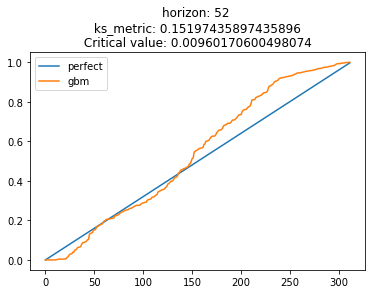

In [64]:
alpha = 0.005
N = len(p_list)
critical_value = np.log(2/alpha) / (2*N)

uniform = np.arange(0,len(p_list), 1) / len(p_list)
model_uniform = np.sort(p_list)
ks_metric = np.max(np.abs(model_uniform - uniform))
plt.plot(uniform, label='perfect')
plt.plot(model_uniform, label='gbm')
plt.title('horizon: %s \n ks_metric: %s \n Critical value: %s ' % (str(horizon_w), str(ks_metric), str(critical_value)))
plt.legend()

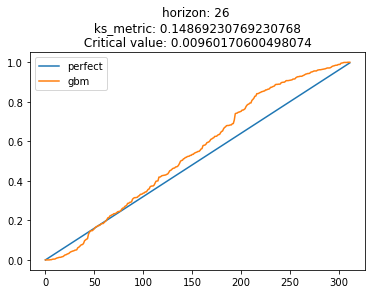

In [66]:
alpha = 0.005
N = len(p_list)
critical_value = np.log(2/alpha) / (2*N)

uniform = np.arange(0,len(p_list), 1) / len(p_list)
model_uniform = np.sort(p_list)
ks_metric = np.max(np.abs(model_uniform - uniform))
plt.plot(uniform, label='perfect')
plt.plot(model_uniform, label='gbm')
plt.title('horizon: %s \n ks_metric: %s \n Critical value: %s ' % (str(horizon_w), str(ks_metric), str(critical_value)))
plt.legend()

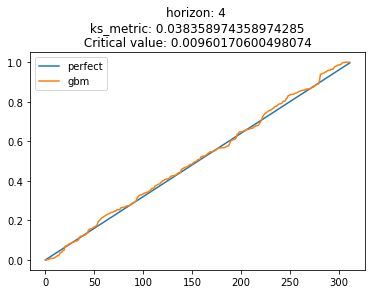

In [62]:
alpha = 0.005
N = len(p_list)
critical_value = np.log(2/alpha) / (2*N)

uniform = np.arange(0,len(p_list), 1) / len(p_list)
model_uniform = np.sort(p_list)
ks_metric = np.max(np.abs(model_uniform - uniform))
plt.plot(uniform, label='perfect')
plt.plot(model_uniform, label='gbm')
plt.title('horizon: %s \n ks_metric: %s \n Critical value: %s ' % (str(horizon_w), str(ks_metric), str(critical_value)))
plt.legend()

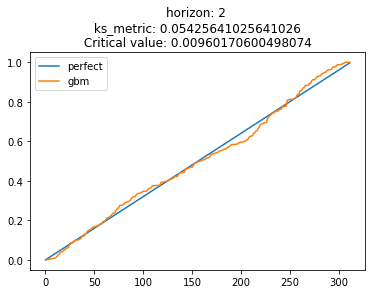

In [68]:
alpha = 0.005
N = len(p_list)
critical_value = np.log(2/alpha) / (2*N)

uniform = np.arange(0,len(p_list), 1) / len(p_list)
model_uniform = np.sort(p_list)
ks_metric = np.max(np.abs(model_uniform - uniform))
plt.plot(uniform, label='perfect')
plt.plot(model_uniform, label='gbm')
plt.title('horizon: %s \n ks_metric: %s \n Critical value: %s ' % (str(horizon_w), str(ks_metric), str(critical_value)))
plt.legend()

#### Critical Values(generating scenarios from the original model)


In [73]:
quantile_list = []

horizon_w = 4
calibration_freq_w = 12
backtesting_window_w = 6 * 52
equity_name = 'DAIMLER AG'
params = calibrate_gbm(df_x[[equity_name]], delta=1/52)


for el in range(200):
    today=ql.Date(1, 7, 2020)
    initialValue = df_x[equity_name][0]

    # date_grid = [ql.Date().from_date(el) for el in df_x.index ]
    df_dates = pd.date_range(start=df_x.index[0],end=df_x.index[-1], freq='D').to_frame()
    date_grid = [today + ql.Period(i,ql.Days) for i in range(0,len(df_dates))]
    nPaths = 1

    df_bootstrapped = simulate_gbm(initialValue, date_grid, nPaths, params[equity_name])
    df_bootstrapped.index = pd.to_datetime([el.to_date() for el in df_bootstrapped.index])
    df_bootstrapped = df_bootstrapped[df_bootstrapped.index.weekday == 2]
    df_dates_w = df_dates[df_dates.index.weekday == 2]
    df_bootstrapped.index = df_dates_w.index
    df_bootstrapped = df_bootstrapped.rename(columns={0: equity_name})

    p_list = backtest_gbm(df_bootstrapped, horizon_w, backtesting_window_w, calibration_freq_w,
                          equity_name, bt_beginning_date=bt_beginning)
    quantile_list.append(np.sort(p_list))

{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.37264600573535667, 'sigma': 0.3738595292633802}}
{'DAIMLER AG': {'mu': 0.37264600573535667, 'sigma': 0.3738595292633802}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015


C:\python\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': 0.25778456788606957, 'sigma': 0.36798682921142184}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': 0.20248792809155625, 'sigma': 0.36461811685189516}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': 0.13503960509755802, 'sigma': 0.36000677494186634}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.11883352130779042, 'sigma': 0.38025538

{'DAIMLER AG': {'mu': -0.018150655557509165, 'sigma': 0.3870941737608191}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.11827688178028495, 'sigma': 0.392703259610116}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': 0.13333430131589516, 'sigma': 0.3864605476644183}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.19502394057869354, 'sigma': 0.37661680488257304}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
Jun

April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.17851591121846735, 'sigma': 0.3550506250575372}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': 0.19151293614669124, 'sigma': 0.35576398507621104}}
August 24th, 2016
August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': 0.1397387247339924, 'sigma': 0.3594521304507222}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG

October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': 0.07618439483580415, 'sigma': 0.34237955985003743}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.06447917783493341, 'sigma': 0.3457783232913938}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': 0.03636701304724796, 'sigma': 0.34141636064293523}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': -0.010652255124970228, 'sigma': 0.34

March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': 0.03208331542423391, 'sigma': 0.3327582609124224}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': -0.08160915179090472, 'sigma': 0.34128181344563197}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': -0.12938483666139358, 'sigma': 0.33681199283341473}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': -0.0714018459

October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.23365868552748242, 'sigma': 0.37322634068792987}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0.38135901794818583, 'sigma': 0.38024865166145067}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': 0.4107946032490443, 'sigma': 0.3804927981690369}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 2

May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': -0.15040835841857442, 'sigma': 0.3613532100956033}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': -0.1013074213475747, 'sigma': 0.3585351983052961}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': -0.1264211548431525, 'sigma': 0.36656710929627295}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
Febru

November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': -0.2607471637166977, 'sigma': 0.37259882840754993}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': -0.17640399874893598, 'sigma': 0.3812862634985096}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': -0.11862090489053427, 'sigma': 0.37684218281599935}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': -0.19069535779323987, 'sigma': 0.37928966

May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': -0.15384461891142837, 'sigma': 0.3469026311809529}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': -0.04506120883837321, 'sigma': 0.3548537499068961}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': 0.007806311408993148, 'sigma': 0.3628371482394829}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': -0.027346246695028872, 'sigma': 0.34572515505234636}}
Feb

{'DAIMLER AG': {'mu': 0.3030996445228029, 'sigma': 0.3448170292219595}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.26386548873569515, 'sigma': 0.3532994016422253}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': 0.22910788693251846, 'sigma': 0.35431478039724723}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.1736152217895622, 'sigma': 0.3482723857653312}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 

May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.07221146699830355, 'sigma': 0.3563036636993354}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': 0.20914279157219173, 'sigma': 0.36380730489932506}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
10
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.5394362232528394, 'sigma': 0.34958654052448396}}
{'DAIMLER AG': {'mu': 0.5394362232528394, 'sigma': 0.34958654052448396}}
January 14th, 2015

November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
11
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.011186976176737577, 'sigma': 0.31303083267407705}}
{'DAIMLER AG': {'mu': 0.011186976176737577, 'sigma': 0.31303083267407705}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': 0.062072382047564614, 'sigma': 0.3215858295730652}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': -0.006693519280384697, 'sigma': 0.29972732007543806}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015

April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': 0.5754510679773002, 'sigma': 0.35958485972282206}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': 0.5694196990736048, 'sigma': 0.35175988901361555}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.5496302565426351, 'sigma': 0.3563919742290723}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
Febru

November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.19982667463274784, 'sigma': 0.3635104292181678}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': 0.2010304439448392, 'sigma': 0.36272641935345046}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.1747336433149915, 'sigma': 0.3680396558315392}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': 0.14818347993370046, 'sigma': 0.37315197899568947}}
August 24th, 

June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': -0.08056837039999551, 'sigma': 0.37560303470547735}}
August 24th, 2016
August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': -0.1954213451644263, 'sigma': 0.3645999987431748}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': -0.1692149175913889, 'sigma': 0.3668622793941441}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12

January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.16533107005755066, 'sigma': 0.3970640903268988}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': -0.009723518936755438, 'sigma': 0.3928355416538317}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': -0.2045507539437591, 'sigma': 0.3847811465867727}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': -0.21878254647636147, 'sigma': 0.3855571005331238}}
October 18th, 2017
October 25th, 2017
November 1st

August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': 0.14215492523729137, 'sigma': 0.33663219106720543}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': -0.005564287537274379, 'sigma': 0.3334559728546524}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0.01031539323736419, 'sigma': 0.3292829289127556}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30t

March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0.033160878823933655, 'sigma': 0.37271068644715943}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': -0.014800832497063834, 'sigma': 0.3769836433430456}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': 0.07797584841969508, 'sigma': 0.3691058171734037}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': 0.19364471430976526, 'sigma': 0.35664869094664814}}
December 12th, 2018
Dec

September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': 0.17739356077797241, 'sigma': 0.33678707773894156}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': 0.17038314807213017, 'sigma': 0.3215095119529995}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': 0.21831520292399376, 'sigma': 0.3240677610980016}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': 0.2301664943112241, 'sigma': 0.32692154479812335}}
May 29th

March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': 0.6722759810607871, 'sigma': 0.3506779030733693}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': 0.6875177117599345, 'sigma': 0.36364309639854636}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': 0.6176412301482962, 'sigma': 0.38152749488902815}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 

September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': -0.03378118611227386, 'sigma': 0.3696039705156034}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': -0.11355711744131967, 'sigma': 0.37029707937358114}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': -0.24323399872647808, 'sigma': 0.3690523035354967}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July

April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': 0.28659709392298155, 'sigma': 0.3853751733091582}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.2679300830637832, 'sigma': 0.38021160897775835}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': 0.2315087275511144, 'sigma': 0.38144995991100633}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
22
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.062

October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
23
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.060771197145616455, 'sigma': 0.3034361332910167}}
{'DAIMLER AG': {'mu': 0.060771197145616455, 'sigma': 0.3034361332910167}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': 0.08930746193824805, 'sigma': 0.30411724409108454}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': 0.13381600872134194, 'sigma': 0.30949014308791767}}
July 1st, 2015
July 8th

March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': -0.06986611924394716, 'sigma': 0.34945827990802636}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': -0.09546329883917926, 'sigma': 0.345777708329211}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': 0.013887989016329497, 'sigma': 0.35264967158326654}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.007335999995678397, 'sigma': 0.3496884450340992}}
December 16th, 2015


October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.1029121900186568, 'sigma': 0.319691902863137}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': 0.11854581868689773, 'sigma': 0.3165417478198364}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.3039851569710957, 'sigma': 0.32004978287441194}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17t

May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': -0.07505237853241727, 'sigma': 0.34468664458878795}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': -0.21217673109579596, 'sigma': 0.34116235433243525}}
August 24th, 2016
August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': -0.15081244879637085, 'sigma': 0.35328944404457086}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': -0.051399839944193795, 'sigma': 0.3

November 9th, 2016
{'DAIMLER AG': {'mu': 0.3019118595129103, 'sigma': 0.3727280451614151}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.3305415393040876, 'sigma': 0.37163883476298004}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': 0.3732558978011265, 'sigma': 0.3621662260936528}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.28694341497643105, 'sigma': 0.36271203204519925}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2

{'DAIMLER AG': {'mu': 0.29036444014262575, 'sigma': 0.38025061360319984}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.1603132255732474, 'sigma': 0.38128655929936456}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': 0.16190709042748486, 'sigma': 0.37870304159172746}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.23437383819574853, 'sigma': 0.3751244079071262}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 

November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.029362115370802508, 'sigma': 0.3793688475654758}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0.21208569291332838, 'sigma': 0.373737289905642}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': 0.09315472551708978, 'sigma': 0.3727196977581964}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': -0.02

April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': 0.04966644834792393, 'sigma': 0.3748709327685337}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': 0.09517720298635857, 'sigma': 0.3719929578808938}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': 0.19986962956638238, 'sigma': 0.3728675508333926}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 2

November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': 0.24759024635842455, 'sigma': 0.330304979262979}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': 0.2962200912759042, 'sigma': 0.3284078326445791}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': 0.30311704729661304, 'sigma': 0.32730915161186164}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': 0.17372728700508297, 'sigma': 0.3299372467120484}}
August 21st, 2019
August 28th, 201

May 22nd, 2019
{'DAIMLER AG': {'mu': -0.19075237912253343, 'sigma': 0.3435133751607705}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': -0.08207881052823668, 'sigma': 0.3506184811742846}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': 0.10238807741819884, 'sigma': 0.33895609439839314}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.08578479877706247, 'sigma': 0.3264274548104403}}
February 5th, 2020
February 12th, 2

November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.036127978073666286, 'sigma': 0.3433191513832512}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': -0.008375542929828145, 'sigma': 0.34000026124232713}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': -0.02602891017684774, 'sigma': 0.34502158648840825}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
S

April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': -0.0844793920534555, 'sigma': 0.34561773551388036}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': -0.1938741749645787, 'sigma': 0.35497614716140263}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
35
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.16961472423227136, 'sigma': 0.3554606225435211}}
{'DAIMLER AG': {'mu': 0.16961472423227136, 'sigma': 0.35546

December 23rd, 2020
December 30th, 2020
36
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': -0.07440818967796387, 'sigma': 0.3514047972952467}}
{'DAIMLER AG': {'mu': -0.07440818967796387, 'sigma': 0.3514047972952467}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': -0.14617252751025417, 'sigma': 0.3421393603041894}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': -0.18317531710870102, 'sigma': 0.35104904984718205}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September

April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': 0.13920472951286378, 'sigma': 0.3113875813566913}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': 0.26964854573353114, 'sigma': 0.31772690234832784}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.274494684782926, 'sigma': 0.32568470676278094}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
Febr

November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.18245319580478342, 'sigma': 0.37754182969491445}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': 0.10400779070722602, 'sigma': 0.3774427655713154}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.2104163277229062, 'sigma': 0.35626191800801155}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': 0.2751590522077559, 'sigma': 0.35847423273228146}}
August 24th, 2016
August 31st, 2

July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': 0.21123720985029876, 'sigma': 0.3506677252632873}}
August 24th, 2016
August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': 0.2567135915150216, 'sigma': 0.36315772514500627}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.30742736799786485, 'sigma': 0.35756771859508}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th

December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.2806329683923111, 'sigma': 0.3477749385573425}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': 0.11943968423438675, 'sigma': 0.3625801734550853}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.13083253338707634, 'sigma': 0.37159163637860415}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': 0.07215209140473848, 'sigma'

July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.2613914568226906, 'sigma': 0.33815144892253396}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': 0.20037508736664655, 'sigma': 0.3365180867205163}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.4037497557187458, 'sigma': 0.35832988625431667}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0.4125226512695199, 'sigma': 0.3589617601577036}

February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0.186412699952504, 'sigma': 0.32895425726537314}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': 0.15309753314011532, 'sigma': 0.32216859175563345}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': 0.12288839673615089, 'sigma': 0.33043183914793023}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': 0.

October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': 0.2716901606616618, 'sigma': 0.35500970713180485}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': 0.2986335419659094, 'sigma': 0.35061676350768367}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': 0.389869177765712, 'sigma': 0.34405119695025327}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER A

April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': 0.24780471047886382, 'sigma': 0.33618073952093325}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': 0.2217444616922756, 'sigma': 0.3374808176337384}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': 0.2488081652732445, 'sigma': 0.3455137705730685}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.23838349610384021, 'sigma': 

October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': -0.17153411386916703, 'sigma': 0.377469056425886}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': -0.17517948299070207, 'sigma': 0.3776432928334744}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': -0.11117091505573175, 'sigma': 0.3832094556737918}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.04343141276174083, 'sigma': 0.3867601009673085}}
July 22nd, 2020
July

April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': 0.08617740174104647, 'sigma': 0.35249737019921795}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.011570042184787376, 'sigma': 0.36018501202710573}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': -0.1263929075254578, 'sigma': 0.35547512918904195}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
47
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIML

November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
48
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.0022101450451722515, 'sigma': 0.38341042153649685}}
{'DAIMLER AG': {'mu': 0.0022101450451722515, 'sigma': 0.38341042153649685}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': 0.066852725187272, 'sigma': 0.389400131739696}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': -0.03769382925487713, 'sigma': 0.38209024273913306}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
Au

{'DAIMLER AG': {'mu': -0.309641985748602, 'sigma': 0.3156724728677639}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': -0.29280198799644414, 'sigma': 0.32670979747083884}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': -0.32688281365204036, 'sigma': 0.33646544300118353}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': -0.25661554248297835, 'sigma': 0.34252686336424065}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6t

October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.0851598169855943, 'sigma': 0.351682758589893}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': 0.08735281980554921, 'sigma': 0.358586291507177}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.20579664079964372, 'sigma': 0.3585609819764812}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG

March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.31087277661048984, 'sigma': 0.36703627277398315}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': 0.3731193959163398, 'sigma': 0.365166820233076}}
August 24th, 2016
August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': 0.44231307183343654, 'sigma': 0.3640287497227992}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017

{'DAIMLER AG': {'mu': 0.014600286006106335, 'sigma': 0.34896033644349156}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.096235118462898, 'sigma': 0.3575983171931503}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': 0.08242565765840411, 'sigma': 0.35656994407884746}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.023358393334526772, 'sigma': 0.3658540377806159}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd,

June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.21894393185276084, 'sigma': 0.3634474845148154}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': 0.29722718279954874, 'sigma': 0.36784796839324707}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.2816059535349747, 'sigma': 0.3694896765611342}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0

January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0.16757174651025883, 'sigma': 0.32577599207563}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': 0.22635754493516502, 'sigma': 0.33342513533446}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': 0.103887145193414, 'sigma': 0.3438468988466224}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th

September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': 0.25878607670142556, 'sigma': 0.36470451538527576}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': 0.19136946153529494, 'sigma': 0.36576245826227444}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': 0.29776183002374884, 'sigma': 0.35312643448393793}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': 0.23402614416104953, 'sigma': 0.3476397775094255}}
May 29

March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': 0.61485929245232, 'sigma': 0.32656275375210286}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': 0.48649862054174386, 'sigma': 0.3406819784621381}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': 0.21672751854302627, 'sigma': 0.34549370812823704}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
Janu

October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': -0.16983067022473172, 'sigma': 0.33955552414648044}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': -0.29037585136747335, 'sigma': 0.3498036321249812}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': -0.33668718342901455, 'sigma': 0.3474860673063393}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': -0.30603759569345457, 'sigma': 0.35582523175171404}}
July 22nd, 2020
July 29th, 2020
Aug

{'DAIMLER AG': {'mu': -0.008570877699541679, 'sigma': 0.3563573556030108}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.12320723311595581, 'sigma': 0.36780127194925744}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': 0.14404687459356208, 'sigma': 0.368311211261724}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
59
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.4143393677728964, 'sigma': 0.358219

November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
60
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.06312515507877546, 'sigma': 0.3661421096408065}}
{'DAIMLER AG': {'mu': 0.06312515507877546, 'sigma': 0.3661421096408065}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': -0.030053341028021083, 'sigma': 0.36975326220401383}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': -0.08629018041972647, 'sigma': 0.36569658412928036}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 201

April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': 0.00893182977259796, 'sigma': 0.357349692903013}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': -0.0577415490956788, 'sigma': 0.352282187973525}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': -0.11558315478606174, 'sigma': 0.3493977601723134}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 

November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.07950010635080437, 'sigma': 0.3846347440259507}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': -0.027540912603155346, 'sigma': 0.3788110322101174}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': -0.11091792408957332, 'sigma': 0.37139809400722984}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': -0.22467743976622892, 'sigma': 0.3628081

April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.013300933237826877, 'sigma': 0.34014605109405355}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': 0.11863979562416344, 'sigma': 0.3389867098528476}}
August 24th, 2016
August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': 0.021155184507187563, 'sigma': 0.3344796808350786}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER

November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.058350442081165715, 'sigma': 0.38499151458614295}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': 0.053192967259368645, 'sigma': 0.38040313668212117}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.035410179615102955, 'sigma': 0.3768165084196428}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
Oct

May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': -0.05393402022816818, 'sigma': 0.3317881861034612}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': -0.03850527206905734, 'sigma': 0.32780542218362674}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.08695922170498549, 'sigma': 0.3355609254445414}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th

December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': -0.027666638402415067, 'sigma': 0.35957297814255074}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0.008240719158030332, 'sigma': 0.35684177030157166}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': -0.06327977280243849, 'sigma': 0.3601433022972624}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': -0.03412219227765431, 'sigma': 0.3603479818941434}}
September 19th, 2018
September 26th, 2018
Octo

June 20th, 2018
{'DAIMLER AG': {'mu': 0.24949244616976646, 'sigma': 0.34692751476344086}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': 0.26570155204154183, 'sigma': 0.3333941208366543}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': 0.31954090884336206, 'sigma': 0.3332265496005772}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': 0.3602983187525342, 'sigma': 0.3360883754551346}}
March 6th, 2019
Ma

December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': -0.10661297054684368, 'sigma': 0.37708507804215574}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': 0.029848743227881724, 'sigma': 0.3804422480449001}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': 0.11705739792046771, 'sigma': 0.37594508018114053}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
Octobe

May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': -0.09984378481068254, 'sigma': 0.37521016372760346}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': -0.2062030732700303, 'sigma': 0.3774104601508479}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': -0.05255035030735758, 'sigma': 0.37872117465216043}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th

January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.15401548786504404, 'sigma': 0.3889869883827867}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': 0.13693770722520382, 'sigma': 0.38137044773829404}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.1509149581087021, 'sigma': 0.3710438464096429}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': 0.2059750704730992, 'sigma': 0.37302940512303734}}
October 14th, 2020
October 21s

August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': -0.011515226446064508, 'sigma': 0.3334729516244435}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
72
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.2578997766778983, 'sigma': 0.345481696045476}}
{'DAIMLER AG': {'mu': 0.2578997766778983, 'sigma': 0.345481696045476}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': 0.24426235779630825, 'sigma': 0.32845620639336653}}
Apri

February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': 0.2550999417729901, 'sigma': 0.37884204233754276}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': 0.1873382707380428, 'sigma': 0.378791110927058}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': 0.24840977113536122, 'sigma': 0.37944513102776195}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIM

September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': 0.23439706450880943, 'sigma': 0.3566232492778494}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.4293893487801016, 'sigma': 0.3588637967146709}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': 0.3748976810880767, 'sigma': 0.3480593608304199}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.4646996305188895, 'sigma': 0.342757835530

March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.12791492736649546, 'sigma': 0.37254882749307583}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': 0.21524620374485048, 'sigma': 0.3838533557739438}}
August 24th, 2016
August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': 0.22831541337535838, 'sigma': 0.3733639110398101}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
Janu

September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': -0.03466131273329813, 'sigma': 0.3663373259484972}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.019750958249201096, 'sigma': 0.3894222065122677}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': 0.007058829713032122, 'sigma': 0.38679174600119465}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12

April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': 0.00012784763927534137, 'sigma': 0.33631760235040303}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': -0.000282597786520955, 'sigma': 0.34004340408461625}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': -0.033688895473900644, 'sigma': 0.33004613677623024}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': -0.07328865948897065, 'sigma': 0.3344637107319242}}
Janua

October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.12527104090691382, 'sigma': 0.33041784722234796}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0.00029644881991650746, 'sigma': 0.3284724298478047}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': -0.11209219790550617, 'sigma': 0.32816233801221795}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
Aug

April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': -0.08207396334236232, 'sigma': 0.37581395909887255}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': 0.03443668511516478, 'sigma': 0.36067554850028766}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': -0.08770124003590507, 'sigma': 0.3477566080587286}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 

November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': -0.19206302725897484, 'sigma': 0.3636705234134083}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': -0.2389508513653644, 'sigma': 0.3616658948847226}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': -0.3127145001347289, 'sigma': 0.36085592089519897}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': -0.22770684764399649, 'sigma': 0.37838985794671554}}
August 21

May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': 0.18700404840094356, 'sigma': 0.38236537570325846}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': 0.17081280243026778, 'sigma': 0.37141031543105857}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': 0.13336452504188387, 'sigma': 0.3606968844299525}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.2627074464989545, 'sigma': 0.3673748307310

November 6th, 2019
{'DAIMLER AG': {'mu': 0.09407002892231651, 'sigma': 0.37239043146837114}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.24436936911226384, 'sigma': 0.3820810120356373}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': 0.22357118297446643, 'sigma': 0.3734216370625686}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.15374996522226025, 'sigma': 0.36886318844248805}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12

{'DAIMLER AG': {'mu': 0.3941165219983463, 'sigma': 0.3678538945799439}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.3548006438346121, 'sigma': 0.3703203698249033}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': 0.31530987102552943, 'sigma': 0.3548598141739167}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
84
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.02771725727207335, 'sigma': 0.339458658

{'DAIMLER AG': {'mu': 0.0970510874913412, 'sigma': 0.3740398863692629}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
85
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': -0.0012235943458301368, 'sigma': 0.3897870964020963}}
{'DAIMLER AG': {'mu': -0.0012235943458301368, 'sigma': 0.3897870964020963}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': 0.053305551435360504, 'sigma': 0.3876061929668475}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015

January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': -0.017862712591371815, 'sigma': 0.3824122818291722}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': -0.071890988711652, 'sigma': 0.3706771396492295}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': -0.15755362356916922, 'sigma': 0.36075688653848065}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
De

August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': 0.14665215444716917, 'sigma': 0.31116053456035697}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.04321838529367523, 'sigma': 0.32614663086575624}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': 0.047353667504799406, 'sigma': 0.3377336228249559}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 

February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': 0.09013951408928544, 'sigma': 0.342502363076175}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.22340126752653222, 'sigma': 0.3559933148653682}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': 0.06660304135730213, 'sigma': 0.36614458804946814}}
August 24th, 2016
August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': 0.09906771408588441, 'sigma': 0.3806635183059

August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': 0.10304709615307184, 'sigma': 0.3347538111242326}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.04649324323659755, 'sigma': 0.3312943327311856}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': 0.14538939148471902, 'sigma': 0.32775978864204686}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
Jun

February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': 0.5257252948302158, 'sigma': 0.35839197556145175}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.54702982569594, 'sigma': 0.355250729478782}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': 0.48924458938395005, 'sigma': 0.36503327128339047}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13t

August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': -0.011505935601318858, 'sigma': 0.3409818082668069}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.0909905669113293, 'sigma': 0.338932712776941}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0.06804756862934425, 'sigma': 0.3290518013752838}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{

{'DAIMLER AG': {'mu': 0.3296556204119724, 'sigma': 0.3583232904632443}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': 0.23846363199154536, 'sigma': 0.3576507959150786}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': 0.3299297375964998, 'sigma': 0.36350207464542655}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': 0.39955069781581204, 'sigma': 0.36173025265964026}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
J

September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': -0.20328383024343855, 'sigma': 0.35172838026425374}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': -0.07840532700846106, 'sigma': 0.35311279255907735}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': -0.019493784157014568, 'sigma': 0.34978375606982876}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17

April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': -0.07739023366944014, 'sigma': 0.3229408697201851}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': 0.015004360160903799, 'sigma': 0.3282234253876771}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': 0.06526434355412289, 'sigma': 0.335784488076116}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.06752294646057491, 'sigma'

November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.23725284904433694, 'sigma': 0.3414699331219587}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': 0.20392812679755692, 'sigma': 0.34748795514056097}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.18171659332137582, 'sigma': 0.35245884214629963}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
Septemb

May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.22537296581425592, 'sigma': 0.3505898048607605}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': 0.2223437966874592, 'sigma': 0.35327000577234835}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
97
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': -0.015295913925905694, 'sigma': 0.39658274804686766}}
{'DAIMLER AG': {'mu': -0.015295913925905694, 'sigma': 0.39658274804686766}}
January 14th,

October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
98
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.5022163549208016, 'sigma': 0.34268031583377845}}
{'DAIMLER AG': {'mu': 0.5022163549208016, 'sigma': 0.34268031583377845}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': 0.48638791841344226, 'sigma': 0.34497829812835473}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': 0.5132252555927729, 'sigma': 0.33888678593016186}}
July 1s

March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': 0.12963135477778703, 'sigma': 0.35905928864172537}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': 0.19412459173474472, 'sigma': 0.362926237244964}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': 0.09610941848863222, 'sigma': 0.3574579141828094}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.14697781359108175, 'sigma': 0.3620607828426856}}
December 16th, 2015
December 23rd, 2015
De

September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': -0.009035100599089387, 'sigma': 0.33131310223560523}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': 0.11918263627543282, 'sigma': 0.3391653452567013}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.04975223862662333, 'sigma': 0.34491471137559776}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 

April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.026621592547883703, 'sigma': 0.38417805728977156}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': -0.04586621680145163, 'sigma': 0.3774092190052902}}
August 24th, 2016
August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': 0.04497680534738046, 'sigma': 0.37790728196202933}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.004335377531418452

November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': -0.28455783108940386, 'sigma': 0.3242643728418513}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': -0.20877154280830235, 'sigma': 0.33056615877170425}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': -0.25901582935379386, 'sigma': 0.33447280369365623}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
Septe

June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': -0.1972543066479318, 'sigma': 0.38515395224189164}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': -0.19916961581605197, 'sigma': 0.3919516127658574}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': -0.18305185221220138, 'sigma': 0.3972138842269728}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DA

November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.05565693916960059, 'sigma': 0.34810311559547413}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0.12256761870185973, 'sigma': 0.3483257099049713}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': 0.21761818595152865, 'sigma': 0.34890119924549734}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': 0.2868730558449999, 'si

June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': 0.35972821096866187, 'sigma': 0.3323033566575299}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': 0.2904656177409596, 'sigma': 0.3373070541421941}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': 0.3900743578737216, 'sigma': 0.3369006447459471}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17t

December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': 0.11105308174546873, 'sigma': 0.38687524655638633}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': 0.08661964065834561, 'sigma': 0.37870441217351886}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': 0.014713451700503352, 'sigma': 0.3794229695660169}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 3

July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': 0.053691857408377855, 'sigma': 0.3753834276586464}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': 0.028674730532796018, 'sigma': 0.3620745165670773}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': -0.0029480712569953382, 'sigma': 0.3638877549686215}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'m

{'DAIMLER AG': {'mu': 0.20996991834850276, 'sigma': 0.3610345825777569}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': 0.32282905107412296, 'sigma': 0.36511783956115706}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.27733124261564374, 'sigma': 0.3670238281136145}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': 0.40014085297098256, 'sigma': 0.3436713639204968}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 1

August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': 0.3679548421387789, 'sigma': 0.3460099925596101}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
110
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.09378976399504639, 'sigma': 0.35755089928312095}}
{'DAIMLER AG': {'mu': 0.09378976399504639, 'sigma': 0.35755089928312095}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': -0.09425508138421228, 'sigma': 0.36

March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': 0.3464197179093511, 'sigma': 0.37995756084531845}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': 0.30129961857964116, 'sigma': 0.3773069760471754}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': 0.3270426354388928, 'sigma': 0.3749969067158142}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.33247824437068985, 'sigma': 0.375722264220

October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.42929321454648833, 'sigma': 0.37086856974805815}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': 0.43958133542524175, 'sigma': 0.3467449577532444}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.3693594833522751, 'sigma': 0.3462583811637258}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 1

{'DAIMLER AG': {'mu': -0.009519310107117901, 'sigma': 0.37128176619462633}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': -0.04782795599260789, 'sigma': 0.3553308834444657}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': -0.08679322179493879, 'sigma': 0.34920039536333375}}
August 24th, 2016
August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': -0.1438807243118841, 'sigma': 0.34219558996044547}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
Dec

September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': 0.29442834159563314, 'sigma': 0.3761520352923517}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.1324564783099928, 'sigma': 0.37106079980066453}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': -0.05566518434192326, 'sigma': 0.3539279568712914}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 

April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': 0.1635568330920926, 'sigma': 0.3239741406550461}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.21199626516269138, 'sigma': 0.31445191521059157}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': 0.17340825265922052, 'sigma': 0.317997935631854}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.10058128262767893, 'sigma': 0.3175077352223184}}
J

October 11th, 2017
{'DAIMLER AG': {'mu': 0.09680886349789493, 'sigma': 0.34084561994228424}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.19714575768376383, 'sigma': 0.33802605386804824}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0.17107830070381824, 'sigma': 0.3358191773297778}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': 0.056974433801513874, 'sigma': 0.3289671986009317}}
June 27th, 2018
July 4th, 2018
July 11th, 20

May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': -0.15893415056253302, 'sigma': 0.36861463967276914}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': -0.32461573971512725, 'sigma': 0.3550859940352099}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': -0.37151035564536394, 'sigma': 0.34603024542861505}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
Fe

November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': -0.23258474443014174, 'sigma': 0.33193468932355985}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': -0.09389632164780731, 'sigma': 0.32494621216419955}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': -0.18241887272099522, 'sigma': 0.3213679443536953}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': -0.12491445243430913, 'sigma': 0.32723438035862223}}
August

May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': 0.1342324901189314, 'sigma': 0.3805485438790618}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': 0.01587566581205377, 'sigma': 0.3869777571321146}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': 0.03460706677272295, 'sigma': 0.3805208259218311}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.0594261062610462, 'sigma': 0.37945910312472253}}
February 5th, 2020
Febru

December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.48029660933894636, 'sigma': 0.3712870060184996}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': 0.6543865314214355, 'sigma': 0.346501784263966}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.48001521904046357, 'sigma': 0.36239896299080465}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October

June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.22910322706294292, 'sigma': 0.37316732580411577}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': 0.2236434368110765, 'sigma': 0.3646692723459016}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
122
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': -0.18492751105049673, 'sigma': 0.33555520519307896}}
{'DAIMLER AG': {'mu': -0.18492751105049673, 'sigma': 0.33555520519307896}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
Fe

December 16th, 2020
December 23rd, 2020
December 30th, 2020
123
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': -0.10424595114718012, 'sigma': 0.3287888968987763}}
{'DAIMLER AG': {'mu': -0.10424595114718012, 'sigma': 0.3287888968987763}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': -0.09101307354347507, 'sigma': 0.32959365288759523}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': -0.17368731559744002, 'sigma': 0.332301660908671}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September

May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': 0.09694366956949332, 'sigma': 0.36102367132836916}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': 0.10210806520962074, 'sigma': 0.3662688546002078}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.11891169416084652, 'sigma': 0.3660881579604003}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016


November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.5088665330036874, 'sigma': 0.35879992461673504}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': 0.44224021331176944, 'sigma': 0.3603319555732966}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.4253781920473442, 'sigma': 0.34695128265743186}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': 0.4711216646377696, 'sigma': 0.3399077477659

May 25th, 2016
{'DAIMLER AG': {'mu': 0.19024314448504562, 'sigma': 0.3248501285060675}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': 0.11280950725706423, 'sigma': 0.3202715593744814}}
August 24th, 2016
August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': 0.18232146084263665, 'sigma': 0.3182320138655149}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.2609972320611214, 'sigma': 0.324978141746453}}
February 8th, 2017
February 15th, 20

December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': -0.2634630189635148, 'sigma': 0.36359498000721513}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': -0.2900240500317646, 'sigma': 0.3583915481534067}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': -0.3456056034416224, 'sigma': 0.3614998914779221}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 1

May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.3376798558853736, 'sigma': 0.36533310849200507}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': 0.40055711373034897, 'sigma': 0.3643689102035819}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.39116707155377184, 'sigma': 0.36531647296117914}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 20

November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.055990420151881604, 'sigma': 0.36086200610011443}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0.04719454919102512, 'sigma': 0.35019244494345836}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': -0.049702550358690485, 'sigma': 0.35172428216723}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
Septemb

June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': 0.15829472281352394, 'sigma': 0.35127467292965686}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': 0.21915273165664478, 'sigma': 0.3670850195754762}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': 0.22891570549726806, 'sigma': 0.35594732220489084}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': 0.19070920598053584, 'sigma': 0.3846

January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': 0.03458424915458947, 'sigma': 0.35626438804028343}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': -0.015740441464551128, 'sigma': 0.3498463715327168}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': -0.08610083057152837, 'sigma': 0.34452571995317105}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November

June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': 0.25644940224214563, 'sigma': 0.36169525920693885}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': 0.35096643900268576, 'sigma': 0.3558772096014133}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.2448677474644415, 'sigma': 0.3642937531697254}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th,

January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.21638102944552232, 'sigma': 0.35330619832963517}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': 0.18187594243871097, 'sigma': 0.347770097964497}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.182272740872845, 'sigma': 0.35039802514772317}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': 0.08832695384569107, 'sigma': 0.34982672833708656}}
October 14th, 2020
October 21s

{'DAIMLER AG': {'mu': -0.07519785632015044, 'sigma': 0.3406100383355477}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': -0.11461140616267704, 'sigma': 0.3471997709642077}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
135
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.1771364657176524, 'sigma': 0.3532213768268545}}
{'DAIMLER AG': {'mu': 0.1771364657176524, 'sigma': 0.3532213768268545}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
Mar

January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': 0.189540875065306, 'sigma': 0.37020838197289013}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': 0.07288307770395955, 'sigma': 0.36625149958120756}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': 0.18567965819830196, 'sigma': 0.3628837232861554}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
Novembe

August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': -0.02268832621139011, 'sigma': 0.35428686135828713}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': -0.052542852920650404, 'sigma': 0.3561815782099921}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': -0.11010632257644976, 'sigma': 0.3659772374329037}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': -0.185241723890055

March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.0699153949044208, 'sigma': 0.3543266136362823}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': -0.04108018857478653, 'sigma': 0.35719108729160837}}
August 24th, 2016
August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': -0.019943291285615644, 'sigma': 0.3487532510090723}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017

October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': 0.0129807522795568, 'sigma': 0.3561906161851785}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.01229886501084812, 'sigma': 0.3549931627715376}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': 0.04598551420005818, 'sigma': 0.3544620116500507}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.18182851211625914, 

May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.23307733938284167, 'sigma': 0.3529911123188633}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': 0.11982030919296119, 'sigma': 0.3469859884654803}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.16975157539946129, 'sigma': 0.35458991856028}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
Februar

November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': -0.32444402339769973, 'sigma': 0.34498495602294676}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': -0.2974501024102109, 'sigma': 0.34493747278379877}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': -0.3070085060206444, 'sigma': 0.36020376179114716}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'D

June 20th, 2018
{'DAIMLER AG': {'mu': 0.607432837638186, 'sigma': 0.34311292793509107}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': 0.6895409054871291, 'sigma': 0.3347480916016392}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': 0.6106016518836507, 'sigma': 0.33768195623545627}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': 0.6029521995658123, 'sigma': 0.337321281801696}}
March 6th, 2019
March 

December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': 0.24419561064867026, 'sigma': 0.3647398640262741}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': 0.1681488628086051, 'sigma': 0.35342633006378793}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': 0.12142450198825303, 'sigma': 0.35746641629541454}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 1

June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': 0.24367117843722796, 'sigma': 0.36252124811313147}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': 0.2648508957189857, 'sigma': 0.37616840666058493}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.33877660865646264, 'sigma': 0.3806918027067325}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th,

December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.1101139790355137, 'sigma': 0.37074669528132725}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': 0.06602810191653488, 'sigma': 0.37390564627563216}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.05662173994026427, 'sigma': 0.37373897612383866}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
Octo

July 15th, 2020
{'DAIMLER AG': {'mu': -0.233333932049054, 'sigma': 0.35258986207574644}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': -0.11470589269222382, 'sigma': 0.3632958507086874}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
147
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.22603312200038556, 'sigma': 0.35624658413052573}}
{'DAIMLER AG': {'mu': 0.22603312200038556, 'sigma': 0.35624658413052573}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
M

December 23rd, 2020
December 30th, 2020
148
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.0036672770267284632, 'sigma': 0.3763676627891086}}
{'DAIMLER AG': {'mu': 0.0036672770267284632, 'sigma': 0.3763676627891086}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': -0.03639003602469018, 'sigma': 0.38643051735044653}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': -0.08428404073249926, 'sigma': 0.39015139575390667}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
Septe

May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': 0.017988285214977327, 'sigma': 0.33035850534069516}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': -0.00011998208293632212, 'sigma': 0.3247669689969919}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': -0.14535528685148807, 'sigma': 0.31937873600017697}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu':

December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': -0.0549913869491296, 'sigma': 0.32206878203299005}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': -0.11299028781216902, 'sigma': 0.3150503665013844}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': -0.15949401103281755, 'sigma': 0.316660283525675}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': -0.164655954240183, 'sigma': 0.3235800241452991}}
August 24th, 2016
August 31st, 2016
September 7th, 2

June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': 0.11286391717247266, 'sigma': 0.37632812403875343}}
August 24th, 2016
August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': -0.06639495404036032, 'sigma': 0.3620855820580541}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.010193401400919039, 'sigma': 0.35610216646750653}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd

December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.09831914033122358, 'sigma': 0.3262168927349737}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': 0.08933727939833286, 'sigma': 0.3308433962292179}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.12824934729204435, 'sigma': 0.3329882923201128}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11

July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': -0.14844062462550084, 'sigma': 0.34452682584703087}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': -0.13813567091526882, 'sigma': 0.3504076160155146}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': -0.20360959294198558, 'sigma': 0.34441465970714025}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': -0.31022677743651406, 'sigma

January 3rd, 2018
{'DAIMLER AG': {'mu': 0.13417794150875462, 'sigma': 0.3603562949889289}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': -0.02692094248145463, 'sigma': 0.37174768998085694}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': 0.059812747026997015, 'sigma': 0.37498700863409695}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': 0.0853833950632626, 'sigma': 0.37780517771984395}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 1

July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': 0.09297526362821897, 'sigma': 0.36772179575480646}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': 0.14443719187681842, 'sigma': 0.3652206366664393}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': 0.10192707889340727, 'sigma': 0.3702209486044775}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May

February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': -0.40667573950019853, 'sigma': 0.34555388304179996}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': -0.38159077751896064, 'sigma': 0.34881735382748463}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': -0.20908176407600262, 'sigma': 0.3483448121290608}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': -0.43863667212750745, 'sigma': 0.33489719569005144}}
November 13th, 2019
Novemb

September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': 0.2183833473159898, 'sigma': 0.3196642163899075}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.33458107177080937, 'sigma': 0.31480677078779756}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': 0.2946888830173672, 'sigma': 0.3154115480294015}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020

April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': -0.0434376609171271, 'sigma': 0.3864602064267695}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.04492527475067468, 'sigma': 0.3881268787912582}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': 0.006634704108880743, 'sigma': 0.38780513208876743}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
159
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': -0

September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': 0.28058425009799687, 'sigma': 0.33700460444840313}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
160
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.30335093825291054, 'sigma': 0.350396633677488}}
{'DAIMLER AG': {'mu': 0.30335093825291054, 'sigma': 0.350396633677488}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': 0.35020261657265994, 'sigma': 0.3510178548393894}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 201

March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': 0.14480416392497727, 'sigma': 0.35800284670756183}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': 0.15550764940752596, 'sigma': 0.3708513769499984}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': 0.04096989297924253, 'sigma': 0.3728566198411879}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': -0.0054496715796066575, 'sigma': 0.36456312828123927}}
Dec

October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': -0.1871763846124414, 'sigma': 0.38032482467011225}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': -0.1856589908168521, 'sigma': 0.3663819022502767}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': -0.23951864706995263, 'sigma': 0.3652393273634536}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': -0.2

April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.008171331784809208, 'sigma': 0.37154190398130116}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': 0.26629549084071164, 'sigma': 0.37452758595332086}}
August 24th, 2016
August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': 0.20490778211455277, 'sigma': 0.3696733921719224}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st

November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.06339085862037443, 'sigma': 0.33273823295502636}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': 0.0154950693983563, 'sigma': 0.33325344341854585}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.0981294918617126, 'sigma': 0.3359916065167287}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 

May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.13482830326310502, 'sigma': 0.35398300632746454}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': 0.04972955350669802, 'sigma': 0.3599268492807388}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.06866955097768272, 'sigma': 0.35589056271835073}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th,

December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': -0.06584749757050422, 'sigma': 0.3323716028337035}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0.002238041078448688, 'sigma': 0.32521010544373635}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': -0.019695572358980333, 'sigma': 0.32286564220845554}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': -0.12731823658141656, 'sigma': 0.33107637083327274}}
September 19th, 2018
September 26th, 2018
Oct

July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': 0.3381506234159246, 'sigma': 0.34090359598302816}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': 0.24394813915777652, 'sigma': 0.33380325403743866}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': 0.3927404211363466, 'sigma': 0.33877684985242484}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May

February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': -0.16245200639523705, 'sigma': 0.3689896315757581}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': -0.14872281397386933, 'sigma': 0.37146087845879094}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': -0.14101436159124403, 'sigma': 0.36829341905764357}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': -0.14697929825127615, 'sigma': 0.35946408951367886}}
Novembe

August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': -0.04910305167352781, 'sigma': 0.38870501917211536}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': -0.011669912053469164, 'sigma': 0.392933935530956}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': -0.01973704735830041, 'sigma': 0.39837784699582895}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th,

March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': -0.49386479821088897, 'sigma': 0.38859566778552956}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': -0.3816148756160727, 'sigma': 0.37028539029354435}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': -0.2956394984376833, 'sigma': 0.34925078699244877}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
1

September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': 0.15290209463421886, 'sigma': 0.3610669733962096}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
172
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': -0.1821369707606531, 'sigma': 0.3292176968587253}}
{'DAIMLER AG': {'mu': -0.1821369707606531, 'sigma': 0.3292176968587253}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': -0.16387955162257845, 'sigma': 0.31513706371884403}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
Apri

March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': -0.1137686336335311, 'sigma': 0.31841047636043}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': -0.1818105375623057, 'sigma': 0.31915211854536635}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': -0.31189338625753593, 'sigma': 0.3386514175871718}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': -0.22826969434531308, 'sigma': 0.3300617016439551}}
Decembe

November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.35747003488768375, 'sigma': 0.3465261865834655}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': 0.29134771249707775, 'sigma': 0.3538446426152305}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.2775987981977169, 'sigma': 0.3494783082095167}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': 0.1147523310934378, 'sigma

May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.21340845932401314, 'sigma': 0.3326083957344235}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': 0.2798192046747962, 'sigma': 0.3206841835463841}}
August 24th, 2016
August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': 0.380483812096872, 'sigma': 0.3209740617429906}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.26668717090306354, 'sigma': 0.32640641967186457}}
Februa

December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': -0.19411688880185218, 'sigma': 0.35683460386076254}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': -0.05874229919933911, 'sigma': 0.3612568905103316}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.07631450858639244, 'sigma': 0.3537277954074323}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October

July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': -0.08321519580684246, 'sigma': 0.3521170555873513}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': 0.03272945872968798, 'sigma': 0.3489989759882071}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.10477295747070356, 'sigma': 0.3316641632108305}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0.09043426117767558, 'sigma': 0.

December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.03546319695512727, 'sigma': 0.3497556581079549}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': -0.07244664820601456, 'sigma': 0.3361444915803706}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': -0.01808509673718218, 'sigma': 0.33152947282792267}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': -0.03672877627293208, 'sigma': 0.33111881532858134}}
September 19th, 2018
Septemb

June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': -0.07558362132266097, 'sigma': 0.3679744572667622}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': -0.13831318783454427, 'sigma': 0.3657905292774607}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': -0.24243092548100798, 'sigma': 0.35755952074739156}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
Apr

January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': 0.335136022434253, 'sigma': 0.35384233124990444}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': 0.2555119213509297, 'sigma': 0.3563186736548844}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': 0.21272555944643606, 'sigma': 0.3379768529113029}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': 0.19462598122999983, 'sigma': 0.3380870656104959

September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': 0.1457205569121674, 'sigma': 0.3675958976628387}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.2877213544123469, 'sigma': 0.3612929316767611}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': 0.2777321793297801, 'sigma': 0.36210092347221773}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu':

March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': 0.23658578178306672, 'sigma': 0.3564278779422649}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.28688598008438804, 'sigma': 0.3595452857461923}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': 0.1736796685412647, 'sigma': 0.35162028942920787}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
183
{'DAIMLER AG': {'

September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': -0.08069929840782841, 'sigma': 0.33510441939740593}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
184
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.10167813456541827, 'sigma': 0.3184445642880314}}
{'DAIMLER AG': {'mu': 0.10167813456541827, 'sigma': 0.3184445642880314}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': 0.1384429647530084, 'sigma': 0.33549263445208016}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 

February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': -0.06010699064718675, 'sigma': 0.3850578458022479}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': -0.15514811179286211, 'sigma': 0.3851908683878747}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': -0.20613307021267702, 'sigma': 0.38660488290221234}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{

September 16th, 2015
{'DAIMLER AG': {'mu': 0.5332225593219331, 'sigma': 0.37377379985180437}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.494039604421859, 'sigma': 0.38044529629057866}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': 0.35938580238515594, 'sigma': 0.3776325737557914}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.3284100547196016, 'sigma': 0.3732983512898299}}
June 1st, 2016
June 8th, 2016
Ju

{'DAIMLER AG': {'mu': -0.2244844418161206, 'sigma': 0.3351131853677885}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': -0.21673034782386313, 'sigma': 0.3304128188097582}}
June 1st, 2016
June 8th, 2016
June 15th, 2016
June 22nd, 2016
June 29th, 2016
July 6th, 2016
July 13th, 2016
July 20th, 2016
July 27th, 2016
August 3rd, 2016
August 10th, 2016
August 17th, 2016
{'DAIMLER AG': {'mu': -0.14281155616099908, 'sigma': 0.3427362564114732}}
August 24th, 2016
August 31st, 2016
September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': -0.011739486514209113, 'sigma': 0.3568071476773005}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
Decemb

September 7th, 2016
September 14th, 2016
September 21st, 2016
September 28th, 2016
October 5th, 2016
October 12th, 2016
October 19th, 2016
October 26th, 2016
November 2nd, 2016
November 9th, 2016
{'DAIMLER AG': {'mu': 0.030982454352764956, 'sigma': 0.3455348923866913}}
November 16th, 2016
November 23rd, 2016
November 30th, 2016
December 7th, 2016
December 14th, 2016
December 21st, 2016
December 28th, 2016
January 4th, 2017
January 11th, 2017
January 18th, 2017
January 25th, 2017
February 1st, 2017
{'DAIMLER AG': {'mu': 0.04486831485886728, 'sigma': 0.3515677670909075}}
February 8th, 2017
February 15th, 2017
February 22nd, 2017
March 1st, 2017
March 8th, 2017
March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': -0.047729812816897026, 'sigma': 0.32816874044810096}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
Ju

March 15th, 2017
March 22nd, 2017
March 29th, 2017
April 5th, 2017
April 12th, 2017
April 19th, 2017
April 26th, 2017
{'DAIMLER AG': {'mu': 0.30413392991909083, 'sigma': 0.33301215803005724}}
May 3rd, 2017
May 10th, 2017
May 17th, 2017
May 24th, 2017
May 31st, 2017
June 7th, 2017
June 14th, 2017
June 21st, 2017
June 28th, 2017
July 5th, 2017
July 12th, 2017
July 19th, 2017
{'DAIMLER AG': {'mu': 0.4316456436708221, 'sigma': 0.35099921743558526}}
July 26th, 2017
August 2nd, 2017
August 9th, 2017
August 16th, 2017
August 23rd, 2017
August 30th, 2017
September 6th, 2017
September 13th, 2017
September 20th, 2017
September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': 0.47649559937010594, 'sigma': 0.35470350146418816}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu'

September 27th, 2017
October 4th, 2017
October 11th, 2017
{'DAIMLER AG': {'mu': 0.4406670464721753, 'sigma': 0.37901909147515017}}
October 18th, 2017
October 25th, 2017
November 1st, 2017
November 8th, 2017
November 15th, 2017
November 22nd, 2017
November 29th, 2017
December 6th, 2017
December 13th, 2017
December 20th, 2017
December 27th, 2017
January 3rd, 2018
{'DAIMLER AG': {'mu': 0.33297957084688856, 'sigma': 0.3774441085987755}}
January 10th, 2018
January 17th, 2018
January 24th, 2018
January 31st, 2018
February 7th, 2018
February 14th, 2018
February 21st, 2018
February 28th, 2018
March 7th, 2018
March 14th, 2018
March 21st, 2018
March 28th, 2018
{'DAIMLER AG': {'mu': 0.19830482209474218, 'sigma': 0.3952767292776467}}
April 4th, 2018
April 11th, 2018
April 18th, 2018
April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': 0.17597057106486694, 'sigma': 0.3955215804098857}}
June 27t

April 25th, 2018
May 2nd, 2018
May 9th, 2018
May 16th, 2018
May 23rd, 2018
May 30th, 2018
June 6th, 2018
June 13th, 2018
June 20th, 2018
{'DAIMLER AG': {'mu': -0.03121243281311649, 'sigma': 0.34586883737005863}}
June 27th, 2018
July 4th, 2018
July 11th, 2018
July 18th, 2018
July 25th, 2018
August 1st, 2018
August 8th, 2018
August 15th, 2018
August 22nd, 2018
August 29th, 2018
September 5th, 2018
September 12th, 2018
{'DAIMLER AG': {'mu': -0.03780633756247969, 'sigma': 0.3361437948102444}}
September 19th, 2018
September 26th, 2018
October 3rd, 2018
October 10th, 2018
October 17th, 2018
October 24th, 2018
October 31st, 2018
November 7th, 2018
November 14th, 2018
November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': -0.09905211560185723, 'sigma': 0.3372794562426187}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
Februa

November 21st, 2018
November 28th, 2018
December 5th, 2018
{'DAIMLER AG': {'mu': 0.35683757637385594, 'sigma': 0.3524872070950045}}
December 12th, 2018
December 19th, 2018
December 26th, 2018
January 2nd, 2019
January 9th, 2019
January 16th, 2019
January 23rd, 2019
January 30th, 2019
February 6th, 2019
February 13th, 2019
February 20th, 2019
February 27th, 2019
{'DAIMLER AG': {'mu': 0.40814248968801425, 'sigma': 0.3548279305487279}}
March 6th, 2019
March 13th, 2019
March 20th, 2019
March 27th, 2019
April 3rd, 2019
April 10th, 2019
April 17th, 2019
April 24th, 2019
May 1st, 2019
May 8th, 2019
May 15th, 2019
May 22nd, 2019
{'DAIMLER AG': {'mu': 0.42564533162028106, 'sigma': 0.37310741714082424}}
May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': 0.3504028082615564, 'sigma': 0.3867883472641828}}
August 21st, 2019
August 28th, 20

May 29th, 2019
June 5th, 2019
June 12th, 2019
June 19th, 2019
June 26th, 2019
July 3rd, 2019
July 10th, 2019
July 17th, 2019
July 24th, 2019
July 31st, 2019
August 7th, 2019
August 14th, 2019
{'DAIMLER AG': {'mu': 0.2711596392511907, 'sigma': 0.37475198818639294}}
August 21st, 2019
August 28th, 2019
September 4th, 2019
September 11th, 2019
September 18th, 2019
September 25th, 2019
October 2nd, 2019
October 9th, 2019
October 16th, 2019
October 23rd, 2019
October 30th, 2019
November 6th, 2019
{'DAIMLER AG': {'mu': 0.08953311606872745, 'sigma': 0.3721415244656929}}
November 13th, 2019
November 20th, 2019
November 27th, 2019
December 4th, 2019
December 11th, 2019
December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.16280794441826502, 'sigma': 0.3790101503123294}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 20

December 18th, 2019
December 25th, 2019
January 1st, 2020
January 8th, 2020
January 15th, 2020
January 22nd, 2020
January 29th, 2020
{'DAIMLER AG': {'mu': 0.012002320401201, 'sigma': 0.3646790699975577}}
February 5th, 2020
February 12th, 2020
February 19th, 2020
February 26th, 2020
March 4th, 2020
March 11th, 2020
March 18th, 2020
March 25th, 2020
April 1st, 2020
April 8th, 2020
April 15th, 2020
April 22nd, 2020
{'DAIMLER AG': {'mu': -0.0038225501644978677, 'sigma': 0.37306196714849055}}
April 29th, 2020
May 6th, 2020
May 13th, 2020
May 20th, 2020
May 27th, 2020
June 3rd, 2020
June 10th, 2020
June 17th, 2020
June 24th, 2020
July 1st, 2020
July 8th, 2020
July 15th, 2020
{'DAIMLER AG': {'mu': 0.10940607062808082, 'sigma': 0.3836417717257511}}
July 22nd, 2020
July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': 0.0

July 29th, 2020
August 5th, 2020
August 12th, 2020
August 19th, 2020
August 26th, 2020
September 2nd, 2020
September 9th, 2020
September 16th, 2020
September 23rd, 2020
September 30th, 2020
October 7th, 2020
{'DAIMLER AG': {'mu': 0.1807209555955985, 'sigma': 0.32181541425817456}}
October 14th, 2020
October 21st, 2020
October 28th, 2020
November 4th, 2020
November 11th, 2020
November 18th, 2020
November 25th, 2020
December 2nd, 2020
December 9th, 2020
December 16th, 2020
December 23rd, 2020
December 30th, 2020
196
{'DAIMLER AG': {'mu': 0.11692417432716327, 'sigma': 0.35705597196451144}}
{'DAIMLER AG': {'mu': 0.025567071277982252, 'sigma': 0.3423901669538605}}
{'DAIMLER AG': {'mu': 0.025567071277982252, 'sigma': 0.3423901669538605}}
January 14th, 2015
January 21st, 2015
January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': 0.0409815933139179

January 28th, 2015
February 4th, 2015
February 11th, 2015
February 18th, 2015
February 25th, 2015
March 4th, 2015
March 11th, 2015
March 18th, 2015
March 25th, 2015
April 1st, 2015
{'DAIMLER AG': {'mu': -0.03630761365312063, 'sigma': 0.3723890709732103}}
April 8th, 2015
April 15th, 2015
April 22nd, 2015
April 29th, 2015
May 6th, 2015
May 13th, 2015
May 20th, 2015
May 27th, 2015
June 3rd, 2015
June 10th, 2015
June 17th, 2015
June 24th, 2015
{'DAIMLER AG': {'mu': -0.07390641664398703, 'sigma': 0.37638815914235113}}
July 1st, 2015
July 8th, 2015
July 15th, 2015
July 22nd, 2015
July 29th, 2015
August 5th, 2015
August 12th, 2015
August 19th, 2015
August 26th, 2015
September 2nd, 2015
September 9th, 2015
September 16th, 2015
{'DAIMLER AG': {'mu': 0.06777735841966802, 'sigma': 0.3820384567966747}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
De

September 16th, 2015
{'DAIMLER AG': {'mu': 0.3177415499821136, 'sigma': 0.38311857087349754}}
September 23rd, 2015
September 30th, 2015
October 7th, 2015
October 14th, 2015
October 21st, 2015
October 28th, 2015
November 4th, 2015
November 11th, 2015
November 18th, 2015
November 25th, 2015
December 2nd, 2015
December 9th, 2015
{'DAIMLER AG': {'mu': 0.3855367291225976, 'sigma': 0.37246623017073754}}
December 16th, 2015
December 23rd, 2015
December 30th, 2015
January 6th, 2016
January 13th, 2016
January 20th, 2016
January 27th, 2016
February 3rd, 2016
February 10th, 2016
February 17th, 2016
February 24th, 2016
March 2nd, 2016
{'DAIMLER AG': {'mu': 0.3124095537182085, 'sigma': 0.37477274377983183}}
March 9th, 2016
March 16th, 2016
March 23rd, 2016
March 30th, 2016
April 6th, 2016
April 13th, 2016
April 20th, 2016
April 27th, 2016
May 4th, 2016
May 11th, 2016
May 18th, 2016
May 25th, 2016
{'DAIMLER AG': {'mu': 0.3038809841183763, 'sigma': 0.3661309339426971}}
June 1st, 2016
June 8th, 2016
J

(array([23., 28., 24., 23., 21.,  7., 12., 15., 11.,  7., 10.,  6.,  2.,
         2.,  1.,  1.,  2.,  1.,  1.,  3.]),
 array([0.00028205, 0.00490385, 0.00952564, 0.01414744, 0.01876923,
        0.02339103, 0.02801282, 0.03263462, 0.03725641, 0.04187821,
        0.0465    , 0.05112179, 0.05574359, 0.06036538, 0.06498718,
        0.06960897, 0.07423077, 0.07885256, 0.08347436, 0.08809615,
        0.09271795]),
 <a list of 20 Patch objects>)

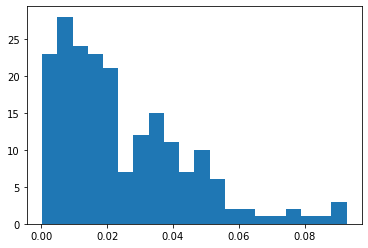

In [91]:
plt.hist(np.abs((np.array(quantile_list) - uniform))[:, -140], bins=20)

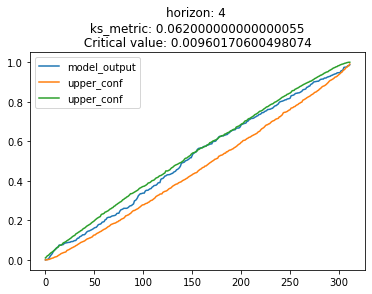

In [98]:
plt.plot(model_uniform, label='model_output')
plt.title('horizon: %s \n ks_metric: %s \n Critical value: %s ' % (str(horizon_w), str(ks_metric), str(critical_value)))


uniform = np.arange(0,len(p_list), 1) / len(p_list)
# plt.plot(uniform, label='perfect')
plt.plot(np.sort(pd.DataFrame(np.array(quantile_list)).quantile(0.05,axis=0)), label='upper_conf')
plt.plot(np.sort(pd.DataFrame(np.array(quantile_list)).quantile(0.95,axis=0)), label='upper_conf')
plt.legend()

In [ ]:
df

In [ ]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
a = ECDF((df.iloc[0, 12] + df[12].to_frame().diff(30)).values[:,0])
b = ECDF(df.xs(30).values)
plt.plot(a.x, a.y)
plt.plot(b.x, b.y)

In [ ]:
%config IPCompleter.greedy = True
from QuantLib import *
import numpy as Numpy
import matplotlib.pyplot as Matplotlib

# processArray = StochasticProcessArray (Array of correlated 1-D stochastic processes)
# timeGrid = TimeGrid object
def GenerateCorrelatedPaths(processArray, timeGrid, nPaths):
    times = []; [times.append(timeGrid[t]) for t in range(len(timeGrid))]
    generator = UniformRandomGenerator()
    nProcesses = processArray.size()
    nGridSteps = len(times) - 1 # deduct initial time (0.0)
    nSteps = nGridSteps * nProcesses
    sequenceGenerator = UniformRandomSequenceGenerator(nSteps, generator)
    gaussianSequenceGenerator = GaussianRandomSequenceGenerator(sequenceGenerator)
    multiPathGenerator = GaussianMultiPathGenerator(processArray, times, gaussianSequenceGenerator)
    paths = Numpy.zeros(shape = (nPaths, nProcesses, len(timeGrid)))

    # loop through number of paths
    for i in range(nPaths):
        # request multiPath, which contains the list of paths for each process
        multiPath = multiPathGenerator.next().value()
        # loop through number of processes
        for j in range(multiPath.assetNumber()):
            # request path, which contains the list of simulated prices for a process
            path = multiPath[j]
            # push prices to array
            paths[i, j, :] = Numpy.array([path[k] for k in range(len(path))])
    return paths

# create two 1-D stochastic processes
process = []
nProcesses = 2
correlation = -1.0
names = ['equity_1', 'equity_2']
spot = [100.0, 100.0]
mue = [0.01, 0.01]
sigma = [0.10, 0.10]
[process.append(GeometricBrownianMotionProcess(spot[i], mue[i], sigma[i])) for i in range(nProcesses)]
matrix = [[1.0, correlation], [correlation, 1.0]]

# create timegrid object and define number of paths
maturity = 1.0
nSteps = 90
timeGrid = TimeGrid(maturity, nSteps)
nPaths = 20

# create StochasticProcessArray object
# (array of correlated 1-D stochastic processes)
processArray = StochasticProcessArray(process, matrix)
# request simulated correlated paths for all processes
# result array dimensions: nPaths, nProcesses, len(timeGrid)
paths = GenerateCorrelatedPaths(processArray, timeGrid, nPaths)

# plot paths
f, subPlots = Matplotlib.subplots(nProcesses, sharex = True)
f.suptitle('Path simulations rho=' + str(correlation) + ', n=' + str(nPaths))

for i in range(nPaths):
    for j in range(nProcesses):
        subPlots[j].set_title(names[j])
        path = paths[i, j, :]
        subPlots[j].plot(timeGrid, path)